<a href="https://colab.research.google.com/github/khadidja2005/Pytorch_practice/blob/main/Forcasting_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
data = pd.read_csv("/content/CAC40_stocks_2010_2021.csv")
data

,CompanyName,StockName,High,Low,Open,Close,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400.0,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600.0,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200.0,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000.0,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400.0,2010-01-08
...,...,...,...,...,...,...,...,...
81730,LVMH,MC,53.889999,51.279999,53.689999,51.450001,404700.0,2021-01-26
81731,LVMH,MC,50.779999,48.759998,50.419998,49.369999,688200.0,2021-01-27
81732,LVMH,MC,51.820000,49.639999,49.930000,51.189999,480400.0,2021-01-28
81733,LVMH,MC,51.130001,48.990002,51.099998,49.709999,341000.0,2021-01-29


In [ ]:
stock_name= "FTI"
data = data[data["StockName"]==stock_name]
data

,CompanyName,StockName,High,Low,Open,Close,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400.0,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600.0,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200.0,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000.0,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400.0,2010-01-08
...,...,...,...,...,...,...,...,...
2784,TechnipFMC,FTI,10.930000,10.580000,10.860000,10.690000,7856500.0,2021-01-26
2785,TechnipFMC,FTI,11.690000,10.320000,10.500000,11.310000,19791900.0,2021-01-27
2786,TechnipFMC,FTI,11.490000,10.820000,11.260000,10.950000,10710700.0,2021-01-28
2787,TechnipFMC,FTI,11.110000,10.560000,11.000000,10.690000,6330300.0,2021-01-29


In [ ]:
data.isnull().sum()

,0
CompanyName,0
StockName,0
High,0
Low,0
Open,0
Close,0
Volume,0
Date,0


In [ ]:
try:
    data['Date'] = pd.to_datetime(data['Date'])
    print("All cells in the 'Date' column are valid dates.")
except ValueError as e:
    print(f"Invalid date format found: {e}")

All cells in the 'Date' column are valid dates.


<ipython-input-6-579c9e09fb3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data

,CompanyName,StockName,High,Low,Open,Close,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400.0,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600.0,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200.0,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000.0,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400.0,2010-01-08
...,...,...,...,...,...,...,...,...
2784,TechnipFMC,FTI,10.930000,10.580000,10.860000,10.690000,7856500.0,2021-01-26
2785,TechnipFMC,FTI,11.690000,10.320000,10.500000,11.310000,19791900.0,2021-01-27
2786,TechnipFMC,FTI,11.490000,10.820000,11.260000,10.950000,10710700.0,2021-01-28
2787,TechnipFMC,FTI,11.110000,10.560000,11.000000,10.690000,6330300.0,2021-01-29


In [ ]:
df = data.sort_values('Date')
df

,CompanyName,StockName,High,Low,Open,Close,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400.0,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600.0,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200.0,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000.0,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400.0,2010-01-08
...,...,...,...,...,...,...,...,...
2784,TechnipFMC,FTI,10.930000,10.580000,10.860000,10.690000,7856500.0,2021-01-26
2785,TechnipFMC,FTI,11.690000,10.320000,10.500000,11.310000,19791900.0,2021-01-27
2786,TechnipFMC,FTI,11.490000,10.820000,11.260000,10.950000,10710700.0,2021-01-28
2787,TechnipFMC,FTI,11.110000,10.560000,11.000000,10.690000,6330300.0,2021-01-29


In [ ]:
df.columns

Index(['CompanyName', 'StockName', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Date'],
      dtype='object')

In [ ]:
features = df.drop("Close" , axis=1)
features

,CompanyName,StockName,High,Low,Open,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,1908400.0,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,2206600.0,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,2724200.0,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,2581000.0,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,3280400.0,2010-01-08
...,...,...,...,...,...,...,...
2784,TechnipFMC,FTI,10.930000,10.580000,10.860000,7856500.0,2021-01-26
2785,TechnipFMC,FTI,11.690000,10.320000,10.500000,19791900.0,2021-01-27
2786,TechnipFMC,FTI,11.490000,10.820000,11.260000,10710700.0,2021-01-28
2787,TechnipFMC,FTI,11.110000,10.560000,11.000000,6330300.0,2021-01-29


In [ ]:
target = df["Close"]
target

,Close
0,29.615000
1,30.125000
2,30.264999
3,29.915001
4,30.450001
...,...
2784,10.690000
2785,11.310000
2786,10.950000
2787,10.690000


In [ ]:
scaler_target = MinMaxScaler(feature_range=(-1, 1))
target = scaler_target.fit_transform(target.values.reshape(-1, 1))

In [ ]:
target

array([[-0.15894721],
       [-0.14151428],
       [-0.1367288 ],
       ...,
       [-0.7969578 ],
       [-0.80584518],
       [-0.80481969]])

In [ ]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [ ]:
from sklearn.model_selection import train_test_split
seq_length = 100
X, y = create_sequences(target , seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [ ]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

# Model parameters
input_size = 1
hidden_size = 64
num_layers = 2

lstm_model = LSTMModel(input_size, hidden_size, num_layers)
gru_model = GRUModel(input_size, hidden_size, num_layers)


In [ ]:
# Training settings
criterion = nn.MSELoss()
lstm_optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
gru_optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)

def train(model, optimizer, X_train, y_train, epochs=100):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Convert data to tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# Train models
train(lstm_model, lstm_optimizer, X_train_tensor, y_train_tensor)
train(gru_model, gru_optimizer, X_train_tensor, y_train_tensor)


Epoch [0/100], Loss: 0.1548
Epoch [10/100], Loss: 0.1093
Epoch [20/100], Loss: 0.0490
Epoch [30/100], Loss: 0.0139
Epoch [40/100], Loss: 0.0072
Epoch [50/100], Loss: 0.0046
Epoch [60/100], Loss: 0.0036
Epoch [70/100], Loss: 0.0032
Epoch [80/100], Loss: 0.0031
Epoch [90/100], Loss: 0.0030
Epoch [0/100], Loss: 0.1780
Epoch [10/100], Loss: 0.0890
Epoch [20/100], Loss: 0.0119
Epoch [30/100], Loss: 0.0035
Epoch [40/100], Loss: 0.0050
Epoch [50/100], Loss: 0.0028
Epoch [60/100], Loss: 0.0020
Epoch [70/100], Loss: 0.0018
Epoch [80/100], Loss: 0.0017
Epoch [90/100], Loss: 0.0017


In [ ]:
def evaluate(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        loss = criterion(predictions, y_test)
    return predictions, loss

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

# Evaluate LSTM
lstm_predictions, lstm_test_loss = evaluate(lstm_model, X_test_tensor, y_test_tensor)
print(f'LSTM Test Loss: {lstm_test_loss.item():.4f}')

# Evaluate GRU
gru_predictions, gru_test_loss = evaluate(gru_model, X_test_tensor, y_test_tensor)
print(f'GRU Test Loss: {gru_test_loss.item():.4f}')


LSTM Test Loss: 0.0202
GRU Test Loss: 0.0031


In [ ]:
lstm_predictions = scaler_target.inverse_transform(lstm_predictions.numpy())
gru_predictions = scaler_target.inverse_transform(gru_predictions.numpy())
y_test_actual = scaler_target.inverse_transform(y_test_tensor.numpy())


from sklearn.metrics import mean_squared_error, mean_absolute_error

lstm_mse = mean_squared_error(y_test_actual, lstm_predictions)
lstm_mae = mean_absolute_error(y_test_actual, lstm_predictions)

gru_mse = mean_squared_error(y_test_actual, gru_predictions)
gru_mae = mean_absolute_error(y_test_actual, gru_predictions)

print(f'LSTM MSE: {lstm_mse:.4f}, MAE: {lstm_mae:.4f}')
print(f'GRU MSE: {gru_mse:.4f}, MAE: {gru_mae:.4f}')


LSTM MSE: 17.3300, MAE: 3.3289
GRU MSE: 2.6889, MAE: 1.3073


# **GRU is better here **

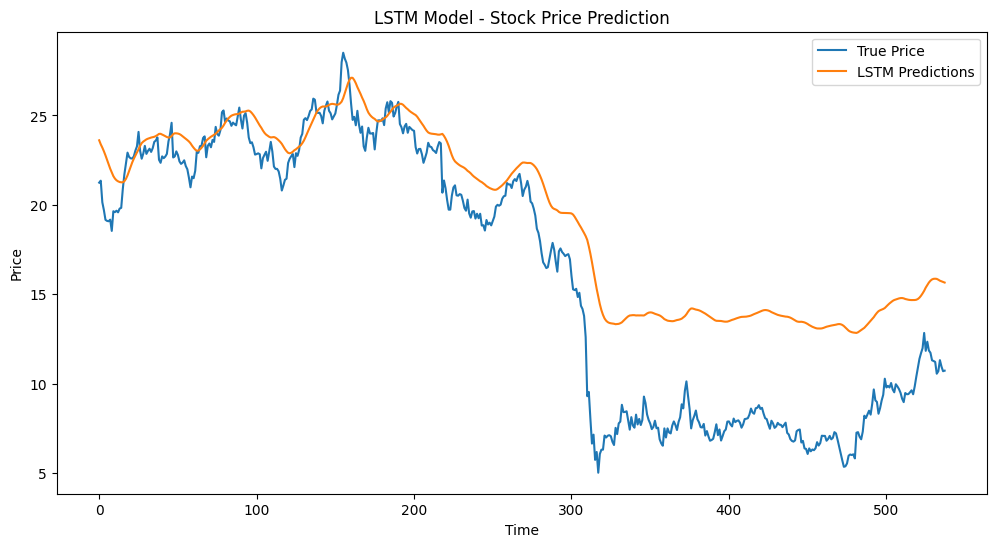

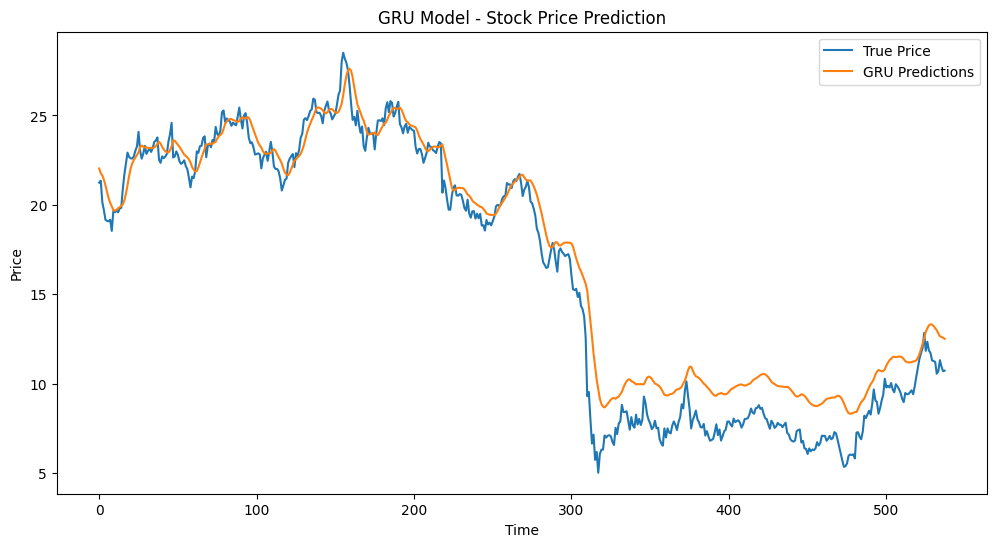

In [ ]:
import matplotlib.pyplot as plt


# Plot LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='True Price')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.title('LSTM Model - Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot GRU predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='True Price')
plt.plot(gru_predictions, label='GRU Predictions')
plt.title('GRU Model - Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
